# Fáza 1: Prieskum dát (Exploratory Data Analysis)
férové rozdelenie práce 50/50


In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

### Načítanie dát do premenných

In [256]:
df_observation = pd.read_csv('datasets/observation.csv',sep='\t')
df_patient = pd.read_csv('datasets/patient.csv',sep='\t')
df_station = pd.read_csv('datasets/station.csv',sep='\t')

# 1.1 Základný opis dát spolu s ich charakteristikami

Pre kazdy z datasetov sme vykonali nasledujúce kroky:
#### 1. Prieskum dát - základné štatistiky a informácie o dátach
1. `info()`
2. `isnul().sum()`
3. `head()`
4. `nunique()` - len unique hodnot
5. `describe()` - štatistiky

#### 2. Analýza atribútov
1. Typy atribútov - `select_dtypes()`
    - `select_dtypes().columns`
    - `select_dtypes().nunique()`

#### 3. Vysledok analýzy - poznámky o dátach, návrhy na úpravy


## Dataset Observation

### 1. Prieskum dát

In [257]:
df_observation.shape

(12047, 23)

In [258]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047 entries, 0 to 12046
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12047 non-null  float64
 1   HR                     12047 non-null  float64
 2   PI                     12047 non-null  float64
 3   RR                     12047 non-null  float64
 4   EtCO₂                  12047 non-null  float64
 5   FiO₂                   12047 non-null  float64
 6   PRV                    12047 non-null  float64
 7   BP                     12047 non-null  float64
 8   Skin Temperature       12047 non-null  float64
 9   Motion/Activity index  12047 non-null  float64
 10  PVI                    12047 non-null  float64
 11  Hb level               12047 non-null  float64
 12  SV                     12047 non-null  float64
 13  CO                     12047 non-null  float64
 14  Blood Flow Index       12047 non-null  float64
 15  PP

In [259]:
df_observation.isnull().sum()

SpO₂                     0
HR                       0
PI                       0
RR                       0
EtCO₂                    0
FiO₂                     0
PRV                      0
BP                       0
Skin Temperature         0
Motion/Activity index    0
PVI                      0
Hb level                 0
SV                       0
CO                       0
Blood Flow Index         0
PPG waveform features    0
Signal Quality Index     0
Respiratory effort       0
O₂ extraction ratio      0
SNR                      0
oximetry                 0
latitude                 0
longitude                0
dtype: int64

In [260]:
df_observation.head()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,97.620193,73.047425,14.796690,14.368778,41.147562,44.998343,101.744512,108.175478,35.284983,11.207029,...,4.024120,57.393854,31.011871,61.170762,84.520164,0.292173,22.855412,1.0,53.69786,-2.68758
1,97.828560,91.254424,15.226811,17.746857,38.822901,67.082312,136.925626,106.173834,35.174372,7.212819,...,4.745712,27.416950,70.006621,36.441271,39.225366,0.210614,33.204156,0.0,53.59782,34.33825
2,96.771755,80.281644,9.746972,18.608674,37.259533,30.457594,117.224898,106.045090,36.168580,13.639960,...,4.094455,58.161639,61.632568,59.933116,55.132717,0.238559,31.176268,1.0,10.73750,122.96660
3,97.060000,78.424910,10.731992,18.942426,37.970214,51.181183,105.148959,107.950747,36.229369,4.946382,...,4.064535,44.622856,64.227237,32.365137,69.857796,0.225224,30.328586,0.0,12.25282,79.41727
4,96.852482,77.855986,9.266719,14.754602,43.034371,49.059859,140.404608,104.395081,35.566732,13.013934,...,4.060419,55.895316,71.565659,65.842228,62.507491,0.214413,20.550401,1.0,-12.91667,-39.25000


In [261]:
df_observation.nunique()

SpO₂                     11869
HR                       11869
PI                       11869
RR                       11869
EtCO₂                    11869
FiO₂                     11869
PRV                      11869
BP                       11869
Skin Temperature         11869
Motion/Activity index    11869
PVI                      11869
Hb level                 11869
SV                       11869
CO                       11869
Blood Flow Index         11869
PPG waveform features    11869
Signal Quality Index     11869
Respiratory effort       11869
O₂ extraction ratio      11869
SNR                      11869
oximetry                     2
latitude                   558
longitude                  558
dtype: int64

In [262]:
df_observation.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,...,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000
mean,97.267672,80.697806,9.833910,16.127032,40.492596,56.430377,104.028280,104.556883,35.712090,10.696255,...,4.161154,52.047837,57.260950,49.055111,53.443099,0.249607,29.971706,0.595335,28.074873,14.764536
std,0.598524,5.155163,2.700888,1.341912,1.726204,9.113699,21.815668,3.718477,0.606053,3.115040,...,0.204165,12.529413,12.585968,13.431124,13.873025,0.028951,5.761003,0.490847,23.392038,71.362268
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,0.476937,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-54.800000,-123.026210
25%,96.866478,77.270972,8.026067,15.065575,39.148665,50.319755,89.683443,102.051506,35.305665,8.396510,...,4.052809,43.541329,48.839388,39.961822,44.047538,0.224547,24.967058,0.000000,13.566670,-45.947220
50%,97.264309,80.698631,9.839743,15.910760,40.725808,56.215376,103.995530,104.548575,35.712252,10.790450,...,4.099662,52.152080,57.212810,48.931583,53.517314,0.249234,30.044146,1.000000,34.864720,13.576610
75%,97.668347,84.159349,11.637860,17.268908,41.860040,62.411973,118.315006,107.076850,36.113696,13.261020,...,4.192040,60.604392,65.718705,58.244514,62.875562,0.274752,34.936653,1.000000,45.780710,72.851070
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,19.452927,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,68.798330,171.253640


### 2. Analýza atribútov

In [263]:
len(df_observation.select_dtypes(include=['float64']).columns)

23

In [264]:
df_observation.select_dtypes(include=['float64']).columns

Index(['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP',
       'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV',
       'CO', 'Blood Flow Index', 'PPG waveform features',
       'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio',
       'SNR', 'oximetry', 'latitude', 'longitude'],
      dtype='object')

In [265]:
df_observation.select_dtypes(include=['float64']).nunique()

SpO₂                     11869
HR                       11869
PI                       11869
RR                       11869
EtCO₂                    11869
FiO₂                     11869
PRV                      11869
BP                       11869
Skin Temperature         11869
Motion/Activity index    11869
PVI                      11869
Hb level                 11869
SV                       11869
CO                       11869
Blood Flow Index         11869
PPG waveform features    11869
Signal Quality Index     11869
Respiratory effort       11869
O₂ extraction ratio      11869
SNR                      11869
oximetry                     2
latitude                   558
longitude                  558
dtype: int64

In [266]:
df_observation['oximetry'].value_counts().sort_index()

oximetry
0.0    4875
1.0    7172
Name: count, dtype: int64

### 3. Vysledok analýzy
- dataset pozostáva z 23 atribútov a 12047 záznamov
- všetky atribúty sú číselné typu `float64` - ide o kontinuálne merania z rôznych senzorov
- neobsahuje žiadne chýbajúce hodnoty

#### Oximetry
- `1.0` → Oxymeter dokázal získať validný SpO₂ signál
- `0.0` → Oxymeter nedokázal získať signál / meranie zlyhalo

=> predikovou premennou nie je „koľko SpO₂“, ale „či sa SpO₂ dalo zmerať“



## Dataset Patient

### 1. Prieskum dát

In [267]:
df_patient.shape

(2069, 13)

In [268]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mail              2069 non-null   object 
 1   birthdate         1138 non-null   object 
 2   registration      2069 non-null   object 
 3   blood_group       2069 non-null   object 
 4   company           2069 non-null   object 
 5   username          2069 non-null   object 
 6   user_id           2069 non-null   int64  
 7   ssn               2069 non-null   object 
 8   residence         0 non-null      float64
 9   name              2069 non-null   object 
 10  job               621 non-null    object 
 11  current_location  1966 non-null   object 
 12  station_ID        2069 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 210.3+ KB


In [269]:
df_patient.isnull().sum()

mail                   0
birthdate            931
registration           0
blood_group            0
company                0
username               0
user_id                0
ssn                    0
residence           2069
name                   0
job                 1448
current_location     103
station_ID             0
dtype: int64

In [270]:
df_patient.head()

,mail,birthdate,registration,blood_group,company,username,user_id,ssn,residence,name,job,current_location,station_ID
0,alicevasconcelos@bol.com.br,2014-05-22,03 Jul 2022,B+,Cavalcanti S/A,theo31,763,38671502902,NaN,Yuri Mendonça,NaN,"(Decimal('75.5622165'), Decimal('140.611314'))",705
1,carla33@hotmail.com,NaN,2019-02-19,AB-,Buck-Brown,donald76,571,648-52-7110,NaN,Amanda Douglas,NaN,"(Decimal('56.355046'), Decimal('-31.498637'))",387
2,julie13@yahoo.com,NaN,18 Apr 2023,B+,Acosta-Black,diazrhonda,1368,472-71-8574,NaN,Jordan Shea,NaN,"(Decimal('77.9571885'), Decimal('-141.860092'))",593
3,murakamishota@hotmail.com,NaN,2021-05-31,A+,加藤農林合同会社,nanamiinoue,1011,156-44-9296,NaN,伊藤 修平,高等学校教員,"(Decimal('5.799277'), Decimal('58.160125'))",429
4,mauro58@gmail.com,NaN,2021-10-19,A-,Ferragni-Rapisardi SPA,gaetanoboito,1662,CMMSYV42C16A763E,NaN,Sig. Atenulf Polani,NaN,"(Decimal('78.8543295'), Decimal('-101.613684'))",388


In [271]:
df_patient.nunique()

mail                2062
birthdate           1119
registration        1875
blood_group            8
company             1885
username            2042
user_id             1315
ssn                 2069
residence              0
name                2018
job                  406
current_location    1966
station_ID           767
dtype: int64

In [272]:
df_patient.describe()

,user_id,residence,station_ID
count,2069.000000,0.0,2069.000000
mean,1030.209763,NaN,409.358627
std,606.638857,NaN,244.337210
min,0.000000,NaN,0.000000
25%,506.000000,NaN,193.000000
50%,999.000000,NaN,406.000000
75%,1571.000000,NaN,625.000000
max,2065.000000,NaN,830.000000


In [273]:
df_patient.groupby('user_id').head()

,mail,birthdate,registration,blood_group,company,username,user_id,ssn,residence,name,job,current_location,station_ID
0,alicevasconcelos@bol.com.br,2014-05-22,03 Jul 2022,B+,Cavalcanti S/A,theo31,763,38671502902,NaN,Yuri Mendonça,NaN,"(Decimal('75.5622165'), Decimal('140.611314'))",705
1,carla33@hotmail.com,NaN,2019-02-19,AB-,Buck-Brown,donald76,571,648-52-7110,NaN,Amanda Douglas,NaN,"(Decimal('56.355046'), Decimal('-31.498637'))",387
2,julie13@yahoo.com,NaN,18 Apr 2023,B+,Acosta-Black,diazrhonda,1368,472-71-8574,NaN,Jordan Shea,NaN,"(Decimal('77.9571885'), Decimal('-141.860092'))",593
3,murakamishota@hotmail.com,NaN,2021-05-31,A+,加藤農林合同会社,nanamiinoue,1011,156-44-9296,NaN,伊藤 修平,高等学校教員,"(Decimal('5.799277'), Decimal('58.160125'))",429
4,mauro58@gmail.com,NaN,2021-10-19,A-,Ferragni-Rapisardi SPA,gaetanoboito,1662,CMMSYV42C16A763E,NaN,Sig. Atenulf Polani,NaN,"(Decimal('78.8543295'), Decimal('-101.613684'))",388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,naokitakahashi@yahoo.com,NaN,2019-01-14,A-,株式会社田中印刷,shotasasaki,1064,345-99-9952,NaN,鈴木 結衣,NaN,"(Decimal('-72.9690365'), Decimal('92.739752'))",602
2065,igordas-neves@gmail.com,NaN,2019/11/22,O-,Siqueira,nogueiravalentina,326,51603748920,NaN,Nicole Gomes,NaN,"(Decimal('87.080457'), Decimal('129.153101'))",444
2066,lucianoletta@fastwebnet.it,2022-03-09,11 Jun 2024,A-,Borghese Group,baldassarepapafava,1519,PLCDNN36E04G289W,NaN,Pina Salieri,Occupational psychologist,"(Decimal('17.415553'), Decimal('-100.277465'))",287
2067,mary08@hotmail.com,NaN,02 Feb 2021,B-,Griffin-Lopez,butlercory,1174,136-94-5197,NaN,Mr. Curtis Wilson,NaN,"(Decimal('52.450246'), Decimal('-96.122513'))",129


### 2. Analýza atribútov

In [274]:
print('Pocet atributov typu int a float:',  len(df_patient.select_dtypes(include=['int64','float64']).columns))

Pocet atributov typu int a float: 3


In [275]:
df_patient.select_dtypes(include=['int64','float64']).columns

Index(['user_id', 'residence', 'station_ID'], dtype='object')

In [276]:
df_patient.select_dtypes(include=['int64','float64']).nunique()

user_id       1315
residence        0
station_ID     767
dtype: int64

In [277]:
print('Pocet atributov typu object:', len(df_patient.select_dtypes(include=['object']).columns))

Pocet atributov typu object: 10


In [278]:
df_patient.select_dtypes(include=['object']).columns

Index(['mail', 'birthdate', 'registration', 'blood_group', 'company',
       'username', 'ssn', 'name', 'job', 'current_location'],
      dtype='object')

In [279]:
df_patient.select_dtypes(include=['object']).nunique()

mail                2062
birthdate           1119
registration        1875
blood_group            8
company             1885
username            2042
ssn                 2069
name                2018
job                  406
current_location    1966
dtype: int64

### 3. Vysledok analýzy
- dátumy ako `birth_date` a `registration` sú ako object --> mali by sa konvertovať na datetime
- `current_location` je ako object --> mali by sa rozložiť na dve číselné premenné (latitude, longitude) typu `float64`
- atribút `residence` má veľa hodnot typu NaN

## Dataset Station
### 1. Prieskum dát

In [280]:
df_station.shape

(831, 6)

In [281]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   code       829 non-null    object 
 1   QoS        831 non-null    object 
 2   longitude  831 non-null    float64
 3   revision   831 non-null    object 
 4   location   831 non-null    object 
 5   latitude   831 non-null    float64
dtypes: float64(2), object(4)
memory usage: 39.1+ KB


In [282]:
df_station.isnull().sum()

code         2
QoS          0
longitude    0
revision     0
location     0
latitude     0
dtype: int64

In [283]:
df_station.head()

,code,QoS,longitude,revision,location,latitude
0,CN,good,117.33333,"03/21/2024, 00:00:00",Asia/Shanghai,34.85000
1,IT,good,13.57661,2022/02/24,Europe/Rome,37.31065
2,US,excellent,-82.07842,16 Dec 2021,America/New_York,26.91756
3,BR,good,-35.71667,09 Feb 2020,America/Recife,-8.66667
4,UA,good,36.25361,2019/01/30,Europe/Zaporozhye,47.48444


In [284]:
df_station.nunique()

code         112
QoS            4
longitude    558
revision     803
location     147
latitude     558
dtype: int64

In [285]:
df_station.describe()

,longitude,latitude
count,831.000000,831.000000
mean,14.827578,28.049053
std,71.465292,23.426477
min,-123.026210,-54.800000
25%,-45.947220,13.542460
50%,13.576610,34.864720
75%,72.895155,45.766750
max,171.253640,68.798330


### 2. Analýza atribútov

In [286]:
print(f"Pocet atributov typu float: {len(df_station.select_dtypes(include=['float64']).columns)}")

Pocet atributov typu float: 2


In [287]:
df_station.select_dtypes(include=['float64']).nunique()

longitude    558
latitude     558
dtype: int64

In [288]:
print(f"Pocet atributov typu object: {len(df_station.select_dtypes(include=['object']).columns)}")

Pocet atributov typu object: 4


In [289]:
df_station.select_dtypes(include=['object']).nunique()

code        112
QoS           4
revision    803
location    147
dtype: int64

### 3. Vysledok analýzy
Dataset `station` predstavuje miesta o senzorových staniciach, kde sa meria oximetria
Vzťah k iným tabuľkám => pacient sa nachádza na nejakej stanici alebo jeho údaje pochádzajú z konkrétneho zariadenia

- vacsina atribútov je typu `object` - názvy staníc, lokality, typy zariadení
- atribúty `latitude` a `longitude` sú číselné typu `float`

Potenciálne problémy:
  - nejednotný spôsob označovania staníc (text vs kód)
  - chýbajúce údaje pri lokalite
  - duplicitné záznamy (viac názvov pre tú istú stanicu)


## Analyza jednotlivych atribútov
Cielom je zistiť, ktoré atribúty najviac súvisia s tým, či je oximetry = 0 alebo 1

### Popis parametrov senzorov

In [290]:
sensor = pd.read_csv('sensor_variable_range.csv',sep='\t')
sensor

,Variable,Unit,Description,Value Range
0,SpO₂,%,Peripheral oxygen saturation,95–100%
1,HR,bpm,Heart rate from pulse oximeter,60–100 bpm
2,PI,%,Perfusion index,0.2–20%
3,RR,breaths/min,Respiratory rate,12–20 breaths/min
4,EtCO₂,mmHg,End-tidal carbon dioxide,35–45 mmHg
5,FiO₂,%,Fraction of inspired oxygen,21–100%
6,PRV,ms,Pulse rate variability,20–200 ms
7,BP,mmHg,Blood pressure (systolic diastolic mean),90/60–120/80 mmHg
8,Skin Temperature,°C,Peripheral temperature,33–38 °C
9,Motion/Activity index,-,Sensor artifact correction,NaN


## Párová Analyza

In [291]:
df_observation.describe().T

,count,mean,std,min,25%,50%,75%,max
SpO₂,12047.0,97.267672,0.598524,95.000000,96.866478,97.264309,97.668347,100.000000
HR,12047.0,80.697806,5.155163,60.000000,77.270972,80.698631,84.159349,100.000000
PI,12047.0,9.833910,2.700888,0.200000,8.026067,9.839743,11.637860,20.000000
RR,12047.0,16.127032,1.341912,12.000000,15.065575,15.910760,17.268908,20.000000
EtCO₂,12047.0,40.492596,1.726204,35.000000,39.148665,40.725808,41.860040,45.000000
FiO₂,12047.0,56.430377,9.113699,21.000000,50.319755,56.215376,62.411973,100.000000
PRV,12047.0,104.028280,21.815668,20.000000,89.683443,103.995530,118.315006,200.000000
BP,12047.0,104.556883,3.718477,90.000000,102.051506,104.548575,107.076850,120.000000
Skin Temperature,12047.0,35.712090,0.606053,33.000000,35.305665,35.712252,36.113696,38.000000
Motion/Activity index,12047.0,10.696255,3.115040,0.476937,8.396510,10.790450,13.261020,19.452927


Atribút oximetry (predikovaná premenná) má min 0.0, čo je fyziologicky nemožné

In [292]:
corr_target = df_observation.corr()['oximetry'].sort_values(ascending=False)
corr_target

oximetry                 1.000000
Motion/Activity index    0.662160
EtCO₂                    0.370463
PVI                      0.287987
PRV                      0.021299
BP                       0.015727
longitude                0.008244
latitude                 0.005494
SpO₂                     0.005029
O₂ extraction ratio      0.003631
PI                       0.000653
Hb level                 0.000571
PPG waveform features    0.000360
Skin Temperature        -0.001038
HR                      -0.004573
SNR                     -0.006086
Respiratory effort      -0.006499
Blood Flow Index        -0.006505
CO                      -0.011521
SV                      -0.013590
Signal Quality Index    -0.015706
RR                      -0.090814
FiO₂                    -0.109546
Name: oximetry, dtype: float64

### 10 významnych atribútov
| Atribút               | Co to znamená                                  |
|-----------------------|------------------------------------------------|
| PI (Perfusion Index)  | perfúzia / kvalita signálu                     |
| Motion/Activity index | artefakty z pohybu                             |
| Signal Quality Index  | kvalita merania                                |
| Skin Temperature      | periférna perfúzia ovplyvňuje PPG              |
| EtCO₂                 | stabilita dýchania                             |
| RR                    | respiračná stabilita                           |
| PRV                   | autonómny stav                                 |
| BP                    | perfúzia                                       |
| CO                    | celkové okysličenie systému                    |
| FiO₂                  | nie priamy, ale prostredníctvom stavu pacienta |


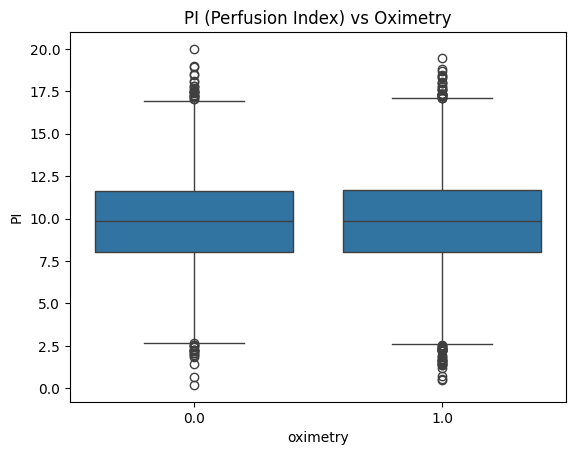

In [293]:
sns.boxplot(data=df_observation, x='oximetry', y='PI')
plt.title("PI (Perfusion Index) vs Oximetry")
plt.show()

In [294]:
REF_TOP10 = {
    "PI": (0.2, 20),                    # Perfusion Index – kľúčový, priamo ovplyvňuje možnosť merania
    "Motion/Activity index": (0, 100),  # pohyb -> artefakty, častá príčina oximetry=0
    "Signal Quality Index": (0, 100),   # hodnotí úspešnosť snímania
    "Skin Temperature": (33, 38),       # nízka teplota -> vazokonstrikcia -> slabý PPG signál
    "EtCO₂": (35, 45),                  # stabilita dychu, sekundárny indikátor
    "RR": (12, 20),                     # stabilita ventilácie
    "PRV": (20, 200),                   # autonómny stav, môže indikovať stres/kolísanie
    "BP": (90, 120),                    # perfúzia na systémovej úrovni
    "CO": (4, 8),                       # celkový výdaj krvi
    "FiO₂": (21, 100),                  # podporný parameter, nie priamy, ale indikuje stav pacienta
}

In [295]:
def attribute_report(df, ranges):
    rows = []
    for col, (lo, hi) in ranges.items():
        s = df[col]
        n = len(s)
        below = (s < lo).sum()
        above = (s > hi).sum()
        rows.append({
            "attribute": col,
            "min": s.min(),
            "max": s.max(),
            "mean": s.mean(),
            "ref_low": lo,
            "ref_high": hi,
            "% out_of_range": round((below + above) / n * 100, 3),
        })
    return pd.DataFrame(rows)


In [296]:
report_top10 = attribute_report(df_observation, REF_TOP10)
report_top10

,attribute,min,max,mean,ref_low,ref_high,% out_of_range
0,PI,0.200000,20.000000,9.833910,0.2,20,0.0
1,Motion/Activity index,0.476937,19.452927,10.696255,0.0,100,0.0
2,Signal Quality Index,0.000000,100.000000,49.055111,0.0,100,0.0
3,Skin Temperature,33.000000,38.000000,35.712090,33.0,38,0.0
4,EtCO₂,35.000000,45.000000,40.492596,35.0,45,0.0
5,RR,12.000000,20.000000,16.127032,12.0,20,0.0
6,PRV,20.000000,200.000000,104.028280,20.0,200,0.0
7,BP,90.000000,120.000000,104.556883,90.0,120,0.0
8,CO,4.000000,8.000000,4.161154,4.0,8,0.0
9,FiO₂,21.000000,100.000000,56.430377,21.0,100,0.0


In [297]:
def plot_top10_grid(df, ranges):
    cols = list(ranges.keys())
    n = len(cols)
    rows = math.ceil(n/2)  # 2 grafy na riadok

    fig, axes = plt.subplots(rows, 2, figsize=(12, rows*3))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        lo, hi = ranges[col]
        s = df[col]

        ax.hist(s, bins=30)
        ax.axvspan(lo, hi, alpha=0.15)
        ax.axvline(lo, linestyle="--")
        ax.axvline(hi, linestyle="--")
        ax.set_title(col)
        ax.set_xlabel("hodnota")
        ax.set_ylabel("počet")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

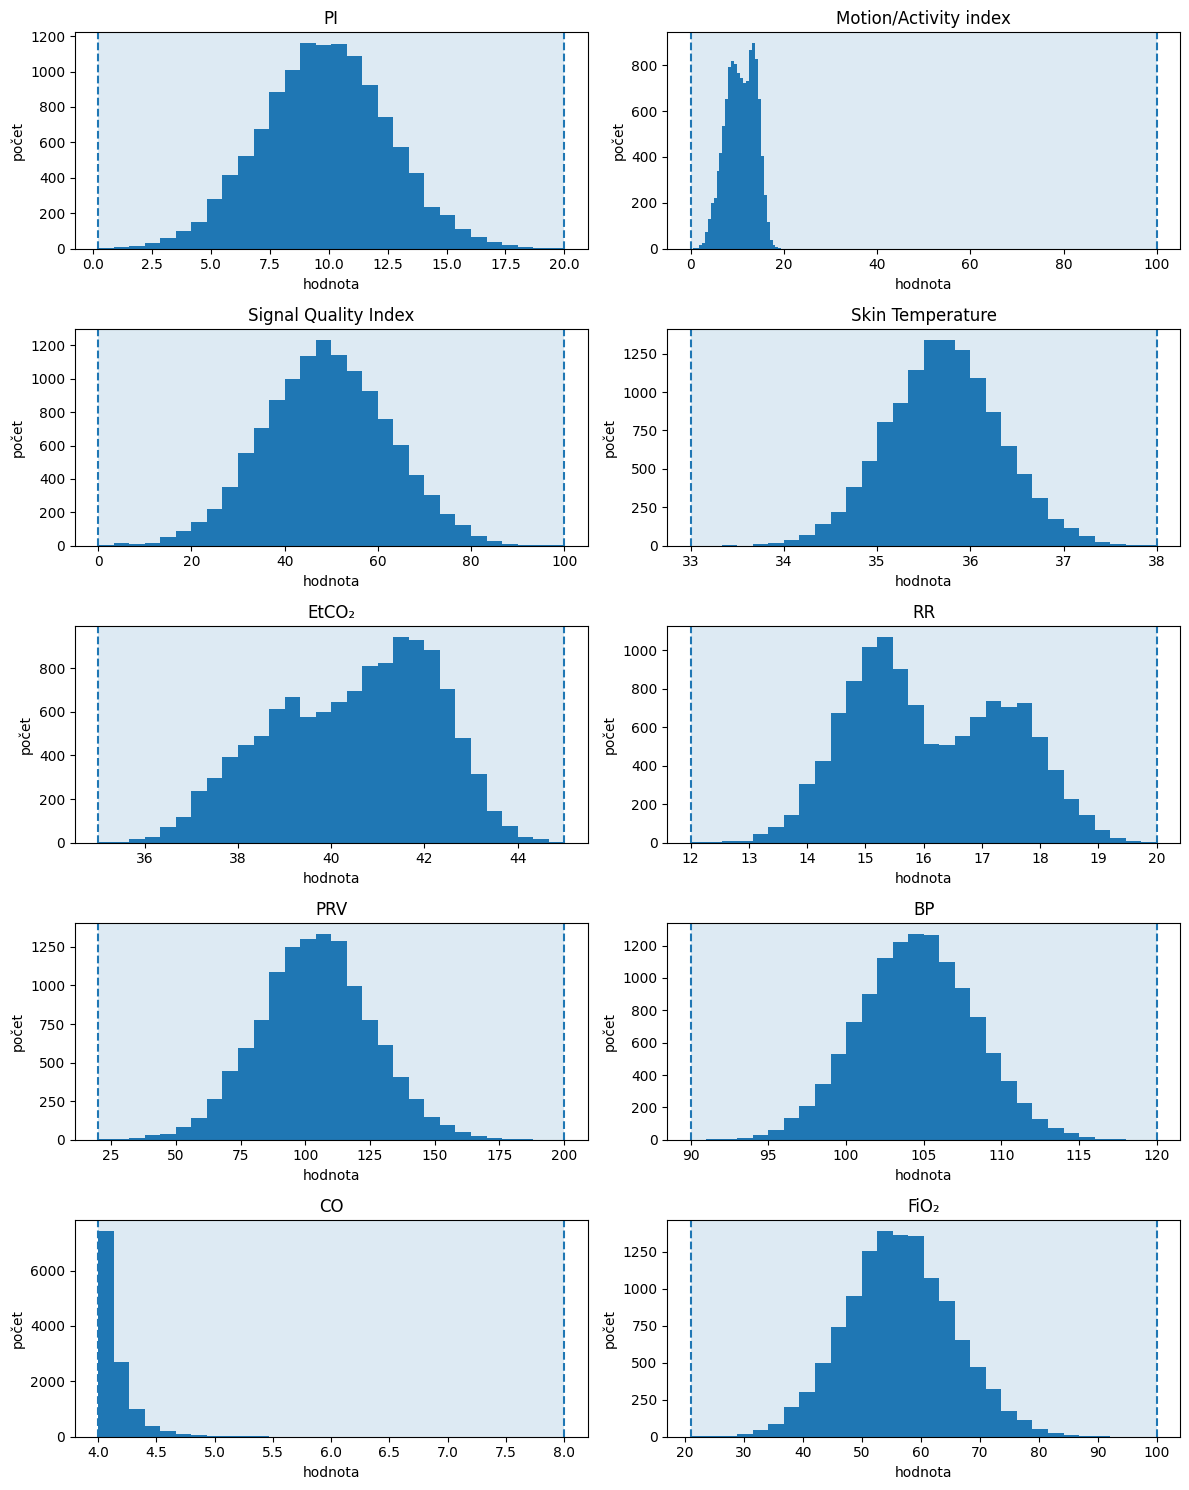

In [298]:
plot_top10_grid(df_observation, REF_TOP10)

### Vzťahy medzi samotnými atribútmi

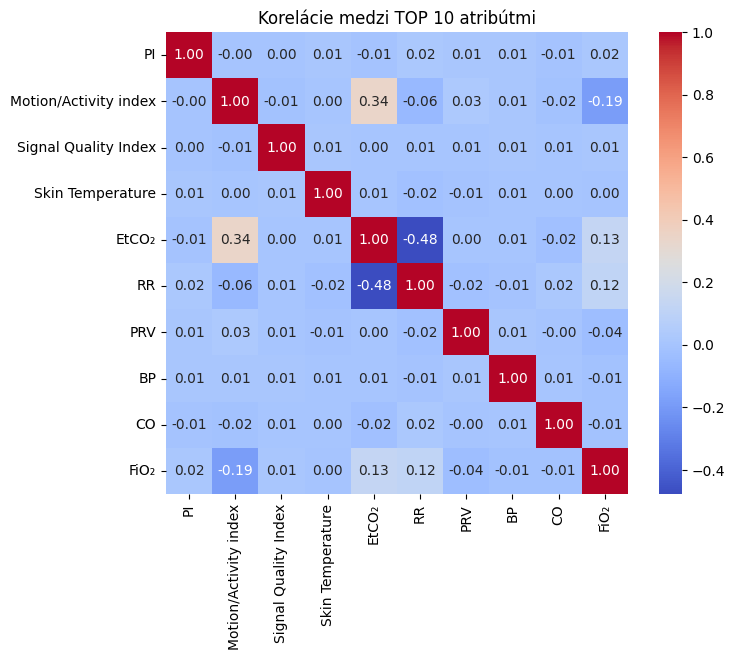

In [299]:
top10_cols = list(REF_TOP10.keys())

corr = df_observation[top10_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korelácie medzi TOP 10 atribútmi")
plt.show()

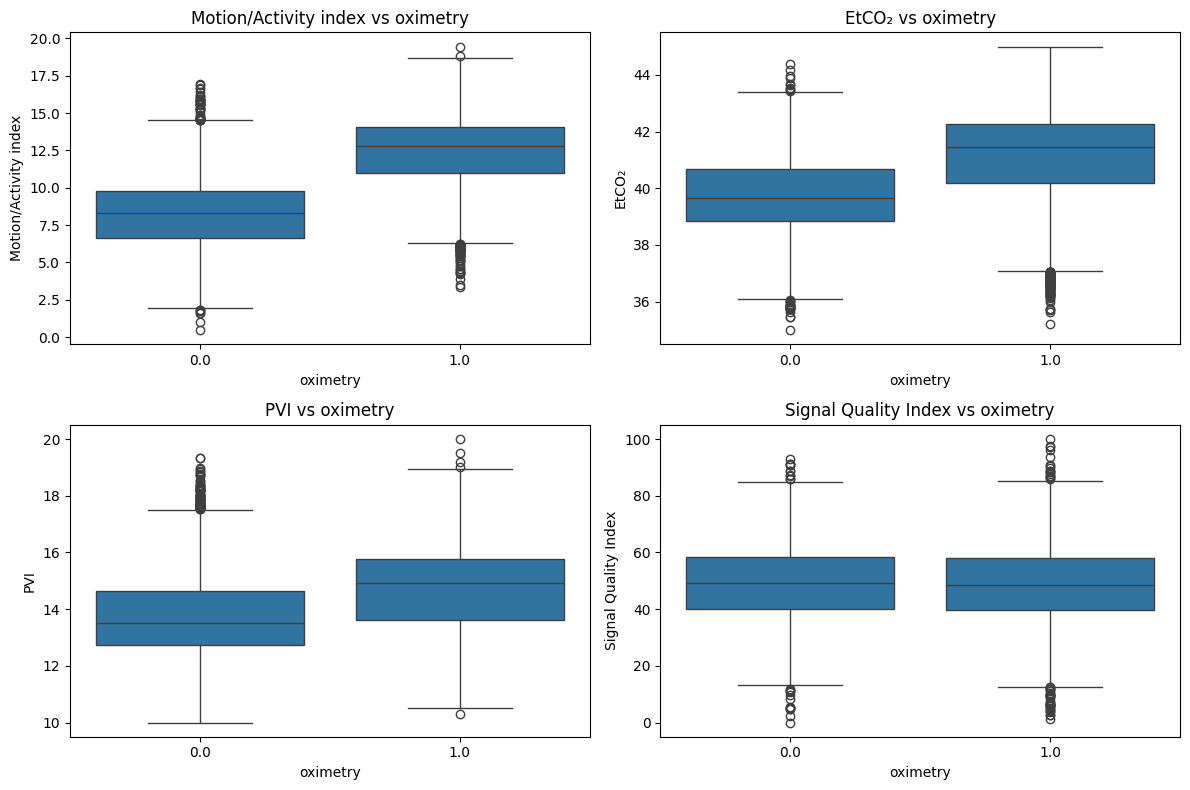

In [300]:
pair_vars = ["Motion/Activity index", "EtCO₂", "PVI", "Signal Quality Index"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
axes = axes.flatten()

for ax, col in zip(axes, pair_vars):
    sns.boxplot(data=df_observation, x="oximetry", y=col, ax=ax)
    ax.set_title(f"{col} vs oximetry")
    ax.set_xlabel("oximetry")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()



## Výsledky EDA
### Záverečné zhrnutie fázy 1.1 (Exploračná dátová analýza)

Analýza datasetu ukázala, že namerané vitálne funkcie (SpO₂, HR, RR, EtCO₂, BP, CO
a pod.) sa pohybujú v fyziologicky stabilných rozsahoch, čo naznačuje, že dáta
pochádzajú zo stabilizovanej populácie pacientov bez výrazných hypoxických alebo
akútnych udalostí.

Predikovaná premenná `oximetry` nie je hodnota SpO₂, ale binárna informácia o
tom, či sa senzorom podarilo zmerať saturáciu (1 = úspešné meranie, 0 = zlyhanie).
To znamená, že úlohou nie je predikovať úroveň oxygenácie, ale **predikovať
dostupnosť/spoľahlivosť oximetrického merania**.

Párová analýza ukázala, že dostupnosť merania nesúvisí priamo s vitálnymi
parametrami (napr. HR, BP, CO), ale so senzormi a signálovými podmienkami.
Najsilnejšie súvislosti boli pozorované medzi:
- `oximetry` a **Motion/Activity index** (pohybové artefakty),
- `oximetry` a **Perfusion Index (PI)** (priechodnosť periférneho prietoku),
- `oximetry` a **Signal Quality Index**,
- čiastočne `oximetry` a **EtCO₂** (respiračná stabilita).

Tieto výsledky naznačujú, že dôvodom zlyhaného oximetrického merania sú najmä
technicko-senzorické podmienky (pohyb, slabá perfúzia, nízky signál), nie
fyziologická zmena vitálneho stavu pacienta.

Z týchto dôvodov bude fáza **1.2 – Čistenie dát** zameraná na:
- identifikáciu záznamov s nízkou kvalitou signálu (oximetry = 0),
- overenie, či ide o artefakty alebo reálne zhoršené meranie,
- rozhodnutie, či tieto záznamy ponechať, upraviť (winsorizácia) alebo odstrániť,
- prípravu dát na modelovanie dostupnosti merania namiesto samotnej hodnoty SpO₂.

### Sanity check pre PI

In [301]:
df_observation.groupby('oximetry')['PI'].describe()

,count,mean,std,min,25%,50%,75%,max
oximetry,,,,,,,,
0.0,4875.0,9.831770,2.689352,0.200000,8.021254,9.843665,11.599899,20.000000
1.0,7172.0,9.835365,2.708887,0.467066,8.027279,9.838462,11.665167,19.463705


- porovnania PI podľa oximetry=0/1 potvrdil, že diferenciácia medzi týmito dvoma stavmi nie je v hodnote saturácie, ale v podmienkach merania, čo podporuje hypotézu o tom, že oximetry reprezentuje kvalitu dostupnosti signálu.

# 1.2 Identifikácia problémov, integrácia a čistenie dát